In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
# ml
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('SummaryofWeather.csv')

/var/folders/21/f04jhrl502sbf8zzw0k0kgdw0000gn/T/ipykernel_5856/4041182362.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SummaryofWeather.csv')


In [3]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

<AxesSubplot:xlabel='MinTemp'>

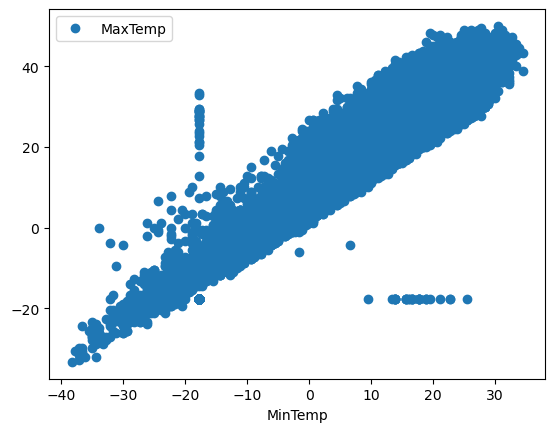

In [6]:
df.plot(x='MinTemp',y='MaxTemp',style='o')

In [11]:
x = df['MinTemp'].values.reshape(-1,1)
y = df['MaxTemp'].values.reshape(-1,1)

In [12]:
x

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [18.33333333],
       [18.33333333],
       [17.22222222]])

In [13]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=.20)

In [14]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
model.coef_

array([[0.91992173]])

In [16]:
model.intercept_

array([10.67458867])

In [17]:
y_pre = model.predict(X_test)

In [18]:
y_pre

array([[30.09515844],
       [31.11729369],
       [10.16352104],
       ...,
       [32.13942894],
       [32.13942894],
       [36.22796995]])

In [20]:
df2 = pd.DataFrame({'Actuall':y_test.flatten() , 'predicted' : y_pre.flatten()})
df2

,Actuall,predicted
0,43.333333,30.095158
1,28.888889,31.117294
2,5.000000,10.163521
3,29.444444,31.117294
4,29.444444,33.161564
...,...,...
23803,30.555556,31.628361
23804,31.666667,32.139429
23805,30.000000,32.139429
23806,28.888889,32.139429


<AxesSubplot:>

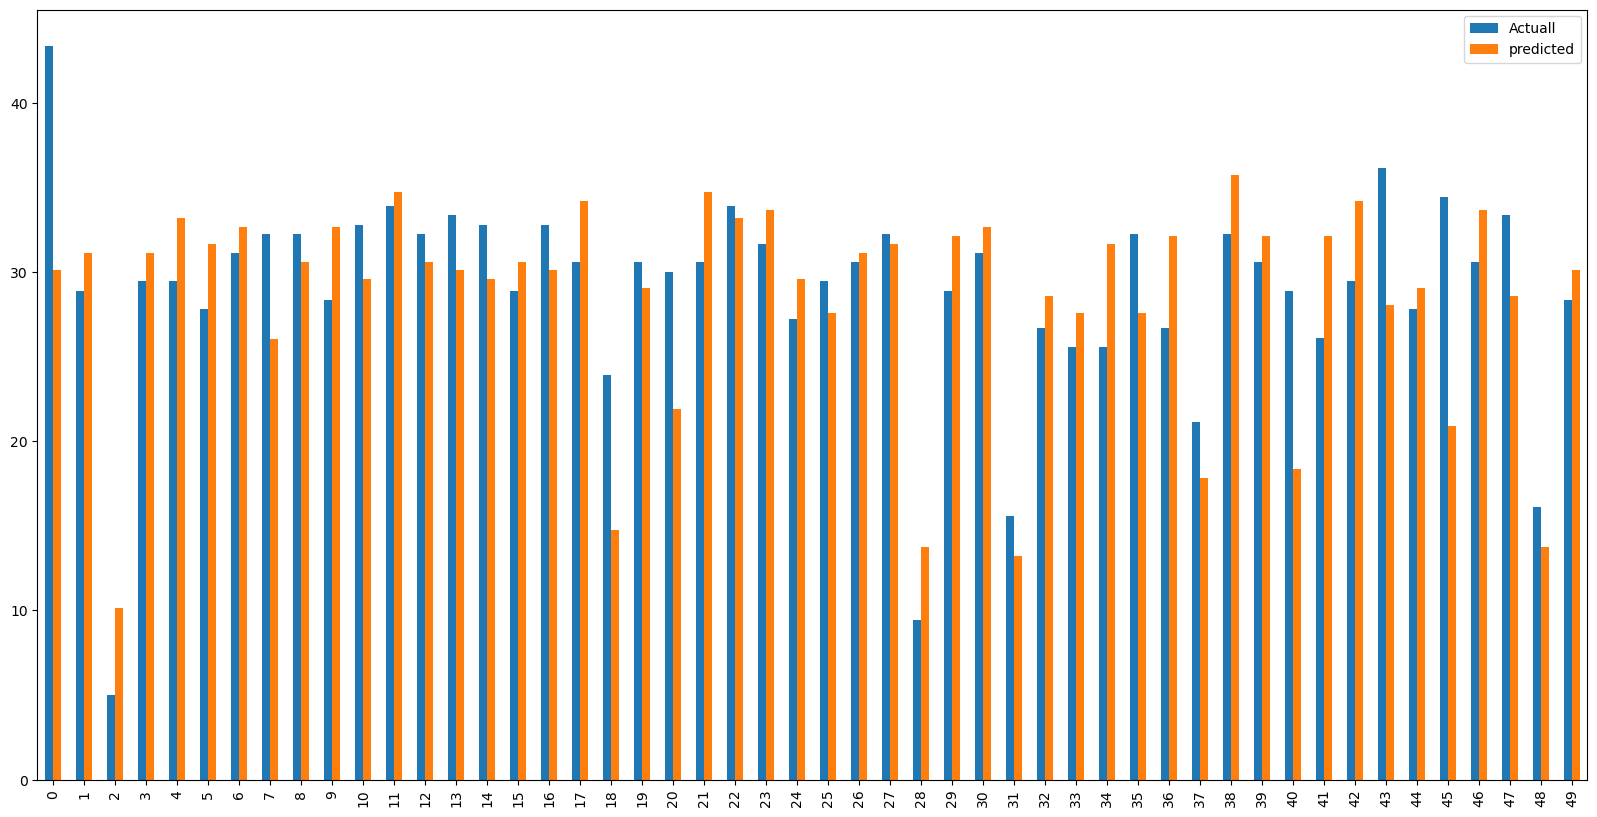

In [25]:
df2.head(50).plot(kind='bar',figsize=(20,10))

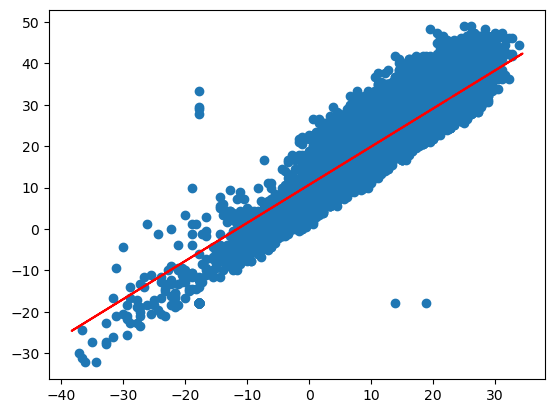

In [22]:
plt.scatter(X_test , y_test)
plt.plot(X_train , model.predict(X_train) , color='red')

In [ ]:
X_test